In [5]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from sklearn.svm import SVC

import cv2

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
data_dir = '/content/drive/MyDrive/GL/DataSets/Plant-seedlings'
train_path = data_dir + '/train/'
test_path =  data_dir + '/test/'

In [118]:
wid = []
hig = []

for cat in os.listdir(train_path):
  dim1 = []
  dim2 = []
  print(cat)
  for image_filename in os.listdir(train_path+'/'+cat):
      
      img = imread(train_path+'/'+cat+'/'+image_filename)
      d1,d2,colors = img.shape
      dim1.append(d1)
      dim2.append(d2)
      wid.append(d1)
      hig.append(d2)
  print(np.mean(dim1))
  print(np.mean(dim2))
  print()

Black-grass
661.3079847908746
668.638783269962

Charlock
431.9769230769231
431.98205128205126

Cleavers
310.2926829268293
310.2926829268293

Common Chickweed
230.708674304419
230.708674304419

Common wheat
440.1674208144796
440.17194570135746

Fat Hen
303.0084210526316
303.0084210526316

Loose Silky-bent
397.8975535168196
399.5963302752294

Maize
483.23981900452486
483.2533936651584

Scentless Mayweed
226.00387596899225
226.00387596899225

Shepherds Purse
288.54112554112555
288.54112554112555

Small-flowered Cranesbill
342.3165322580645
342.3165322580645

Sugar beet
590.3090909090909
591.4779220779221



Black-grass


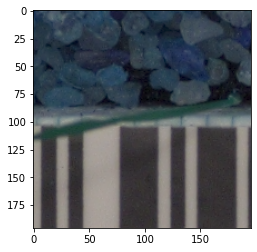

Charlock


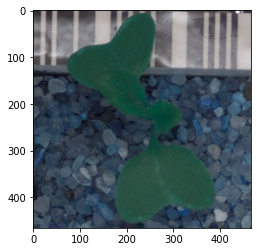

Cleavers


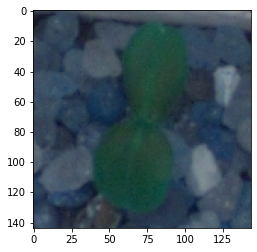

Common Chickweed


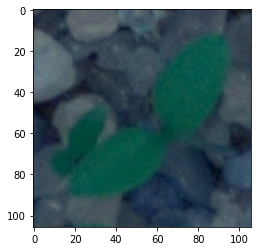

Common wheat


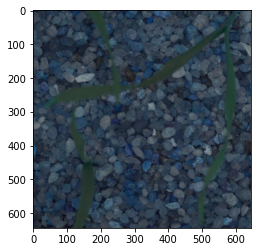

In [114]:

i = 0
for category in cat[:5]:
  # print(category)
  for image in os.listdir(os.path.join(train_path,category))[:1]:
    f = cv2.imread((os.path.join(train_path,category)+'/'+ image))
    print(category)
    plt.imshow(f)
    plt.show();


In [8]:
  train_img = []
train_lab = []
imgs_size = 64

cat  = os.listdir(train_path)

for ohl,category in enumerate(cat):
  # print(category)
  for image in os.listdir(os.path.join(train_path,category)):
    f = cv2.imread((os.path.join(train_path,category)+'/'+ image),0) 
    fr = cv2.resize(f,(imgs_size,imgs_size))

    train_img.append(fr)
    train_lab.append(ohl)


In [9]:
train_img[1]

array([[ 53,  58,  84, ...,  41,  84, 115],
       [ 58,  66,  68, ...,  51,  61,  68],
       [ 70,  59,  70, ...,  58,  51,  84],
       ...,
       [ 48,  53,  57, ...,  85,  80,  80],
       [ 64,  58,  53, ...,  83,  81,  81],
       [ 58,  56,  54, ...,  78,  81,  84]], dtype=uint8)

In [10]:
import numpy as np

X = np.array(train_img)
X.shape

(4750, 64, 64)

In [11]:
X = X.reshape(X.shape[0],64*64)
X.shape

(4750, 4096)

In [12]:
train_lab[0]

0

In [13]:
Y = np.array(train_lab)
Y.shape

(4750,)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [15]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)
print(Y.shape)
print(ytrain.shape)
print(ytest.shape)

(4750, 4096)
(3800, 4096)
(950, 4096)
(4750,)
(3800,)
(950,)


## SVM

In [16]:
classifier = SVC(gamma=0.001)
classifier.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
classifier.score(xtest,ytest)

0.13473684210526315

#Neural Networks

In [18]:
xtrain_n = xtrain/xtrain.max()
xtest_n = xtest/xtest.max()
# X_n = X/X.max()

In [19]:
ytrain_h = to_categorical(ytrain)
ytest_h= to_categorical(ytest)

# y_n = to_categorical(Y)

In [20]:
print(ytrain[0])
ytrain_h[0]

6


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
xtrain_n[0]

array([0.34509804, 0.33333333, 0.3254902 , ..., 0.32941176, 0.32156863,
       0.29411765])

In [22]:
#Build neural Network Model
model_ann = models.Sequential()
model_ann.add(Dense(1024 ,activation = 'relu',input_shape=(64*64, )))
model_ann.add(Dense(512,activation = 'relu'))
model_ann.add(Dense(512,activation = 'relu'))
model_ann.add(Dense(256,activation = 'relu'))
model_ann.add(Dense(256,activation = 'relu'))
model_ann.add(Dense(512,activation = 'relu'))
# model.add(Dense(512,activation = 'relu'))
# model.add(Dense(256,activation = 'relu'))
# model.add(Dense(256,activation = 'relu'))
# model.add(Dense(512,activation = 'relu'))
model_ann.add(Dense(512,activation = 'relu'))
model_ann.add(Dense(12,activation='softmax'))

In [23]:
model_ann.compile(optimizer = Adam(0.1),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [24]:
model_ann.fit(xtrain_n,ytrain_h,epochs = 100,batch_size=32,validation_data=(xtest_n,ytest_h))

Epoch 1/100
119/119 [==============================] - 4s 6ms/step - loss: 77231695.2874 - accuracy: 0.1035 - val_loss: 2.4513 - val_accuracy: 0.1326
Epoch 2/100
119/119 [==============================] - 1s 4ms/step - loss: 2.4333 - accuracy: 0.1371 - val_loss: 2.4095 - val_accuracy: 0.1326
Epoch 3/100
119/119 [==============================] - 0s 4ms/step - loss: 2.4185 - accuracy: 0.1279 - val_loss: 2.4072 - val_accuracy: 0.1326
Epoch 4/100
119/119 [==============================] - 0s 4ms/step - loss: 2.4264 - accuracy: 0.1430 - val_loss: 2.4083 - val_accuracy: 0.1326
Epoch 5/100
119/119 [==============================] - 0s 4ms/step - loss: 2.4185 - accuracy: 0.1412 - val_loss: 2.4131 - val_accuracy: 0.1326
Epoch 6/100
119/119 [==============================] - 0s 4ms/step - loss: 2.4204 - accuracy: 0.1290 - val_loss: 2.4141 - val_accuracy: 0.1326
Epoch 7/100
119/119 [==============================] - 0s 4ms/step - loss: 2.4290 - accuracy: 0.1325 - val_loss: 2.4213 - val_accuracy:

In [25]:
model_ann.evaluate(xtest_n,ytest_h)

30/30 [==============================] - 0s 2ms/step - loss: 2.4136 - accuracy: 0.1326


[2.4135613441467285, 0.1326315850019455]

## CNN

In [26]:
image_size = 64
batch_size = 32

In [27]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [28]:
#Build training generator. 
train_generator = datagen.flow_from_directory(train_path,
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed= 9
                                                )

#Build validation generator
val_generator = datagen.flow_from_directory(train_path,
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True,
                                                   seed= 9
                                                )

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [29]:
train_generator.batch_size

32

In [30]:
train_generator.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [43]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(image_size,image_size,3,)))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.2))

#Add Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(12, activation='softmax'))

In [44]:
epochs = 50
learning_rate = 0.001
optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=learning_rate/epochs)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# model.summary()

In [46]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [47]:
history = model.fit(train_generator,
          epochs = epochs,
          steps_per_epoch = train_generator.n // train_generator.batch_size,  #Number of training images//batch_size
          validation_data = val_generator ,
          validation_steps = val_generator.n // val_generator.batch_size ,
          callbacks = [model_checkpoint],
          verbose = 1
)

Epoch 1/50
118/118 [==============================] - 60s 505ms/step - loss: 2.5888 - accuracy: 0.1503 - val_loss: 2.7460 - val_accuracy: 0.0442

Epoch 00001: val_accuracy improved from -inf to 0.04418, saving model to plant_classifier.h5
Epoch 2/50
118/118 [==============================] - 59s 499ms/step - loss: 1.9419 - accuracy: 0.3540 - val_loss: 3.0629 - val_accuracy: 0.1379

Epoch 00002: val_accuracy improved from 0.04418 to 0.13793, saving model to plant_classifier.h5
Epoch 3/50
118/118 [==============================] - 59s 501ms/step - loss: 1.7275 - accuracy: 0.4254 - val_loss: 3.3767 - val_accuracy: 0.1379

Epoch 00003: val_accuracy did not improve from 0.13793
Epoch 4/50
118/118 [==============================] - 59s 497ms/step - loss: 1.5750 - accuracy: 0.4763 - val_loss: 3.1491 - val_accuracy: 0.1401

Epoch 00004: val_accuracy improved from 0.13793 to 0.14009, saving model to plant_classifier.h5
Epoch 5/50
118/118 [==============================] - 59s 497ms/step - loss:

In [48]:
model.evaluate(val_generator)

30/30 [==============================] - 12s 391ms/step - loss: 1.1073 - accuracy: 0.6399


[1.1073163747787476, 0.6399155259132385]

In [49]:
history_df = pd.DataFrame(history.history)

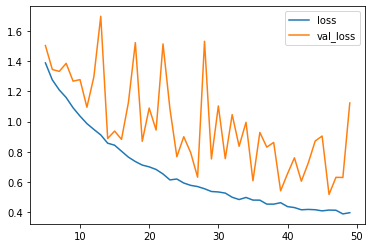

In [50]:
history_df.loc[5:,['loss','val_loss']].plot()

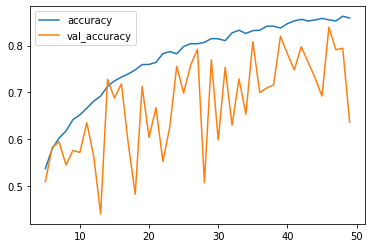

In [51]:
history_df.loc[5:,['accuracy','val_accuracy']].plot()

## 3. Compare the results from the above step along with your detailed observations. 

SVM and ANN almost performed similar i.e, they could not able to find the pattern/weights that classifies the image correctly.
On the other hand, CNN outperformed. It learned patterns better than SVM and ANN.
One strong reason CNN outperformed is coz of more data with ImageDataGenerator technique and ofcourse it extracts features from the images.

## 4. Pickle the best performing model.

In [ ]:
import pickle

with open('CNN_model.pkl', 'wb') as pic:
  pickle.dump(model, pic)

# 5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [84]:
# path = '/content/drive/MyDrive/GL/DataSets/Plant-seedlings/test/'
# img = mpimg.imread(path + '0021e90e4.png')
# imgplot = plt.imshow(img)
# plt.show();

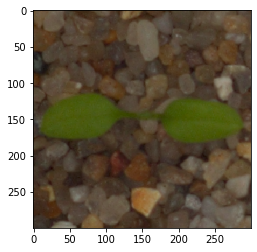

Predicted Class is Maize


In [87]:
import numpy as np
from keras.preprocessing import image

# predicting image
path_ = path + '0911d3dee.png'
img = image.load_img(path_, target_size=(300, 300))
plt.imshow(img)
plt.show();
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_ = np.vstack([x])
classes = model.predict(image_)
# print(classes)
print(f'Predicted Class is {cat[np.argmax(classes,axis=1)[0]]}')